
# WeightWatcher  Norm Checks

In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher

set custom Logging at WARN Level

In [3]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARN)

import weightwatcher as ww
import torchvision.models as models

ww.__version__

Using TensorFlow backend.


'0.2.3'

In [4]:
def get_checks(model):
    ids , norms, check1s, check2s = [], [], [], []
    for im, m in enumerate(model.modules()):
        #if im ==ilayer:
        #print(im, m)
        try:
            W = m.weight.detach().numpy()
            N =  np.max(W.shape)
            L = list(W.shape)
            L.remove(N)
            M = np.max(L)
            if len(W.shape) > 1:
                Gfactor = np.sqrt((N+M)/2.0)
                Nfactor = np.sqrt(N)
                norm = np.linalg.norm(W)
                #print(" {0:2d} {1:.2f} {2:.2f} {3:.2f} ".format(im, norm, norm/Gfactor, norm/Nfactor))
                ids.append(im)
                norms.append(norm)
                
                check1s.append(norm/Nfactor)
                check2s.append(norm/Gfactor)

        except:
            pass
    return ids, norms, check1s, check2s

In [5]:
plt.rcParams.update({'font.size': 16})
from pylab import rcParams
rcParams['figure.figsize'] = 5,5

In [6]:
def plot_checks(all_names, all_models):
    for im, name in enumerate(all_names):
        model = all_models[im]
        ids, norms, check1s, check2s = get_checks(model)
       # plt.title(name)
       # plt.bar(ids,norms, label="None")
       # plt.legend()
       # plt.show()
        plt.bar(ids,check2s, label="Glorot", alpha=0.5)
        plt.bar(ids,check1s, label="RMT", alpha=0.5)
        plt.legend()
        plt.xlabel("layer")
        plt.ylabel("F norm/factor")
        plt.title(name)
        plt.show()

### TODO:  conpute average normalized norm
### should be < 2

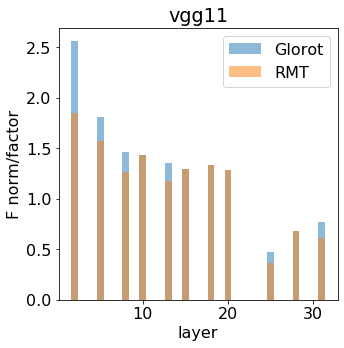

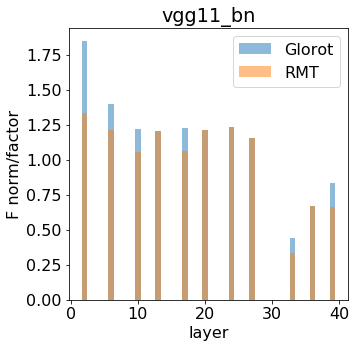

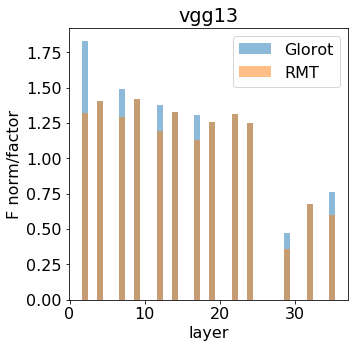

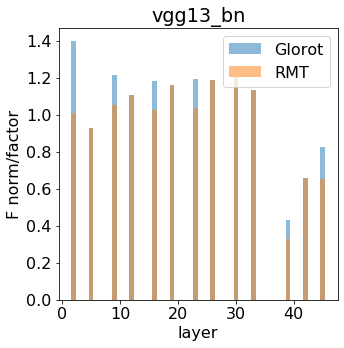

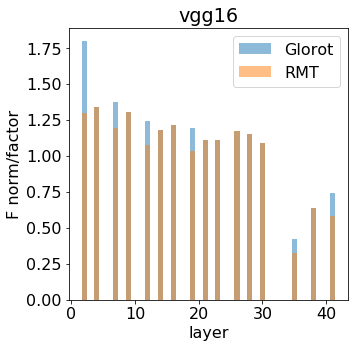

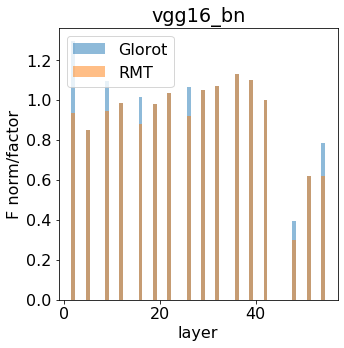

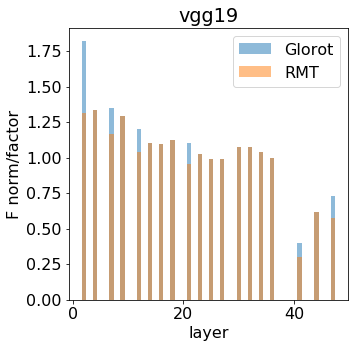

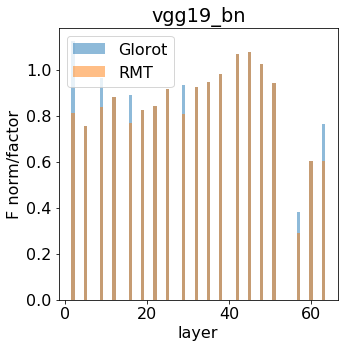

In [7]:
all_names = [ 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn']


all_models = []

all_models.append(models.vgg11(pretrained=True))
all_models.append(models.vgg11_bn(pretrained=True))

all_models.append(models.vgg13(pretrained=True))
all_models.append(models.vgg13_bn(pretrained=True))

all_models.append(models.vgg16(pretrained=True))
all_models.append(models.vgg16_bn(pretrained=True))

all_models.append(models.vgg19(pretrained=True))
all_models.append(models.vgg19_bn(pretrained=True))

plot_checks(all_names, all_models)

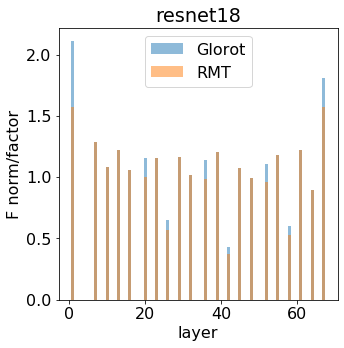

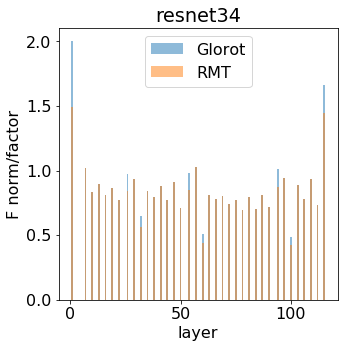

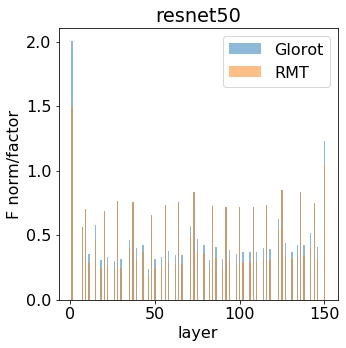

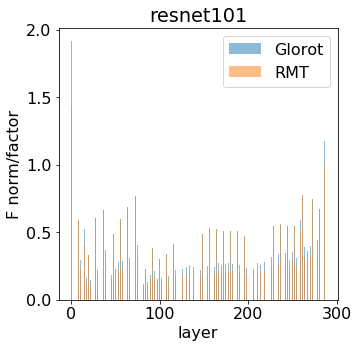

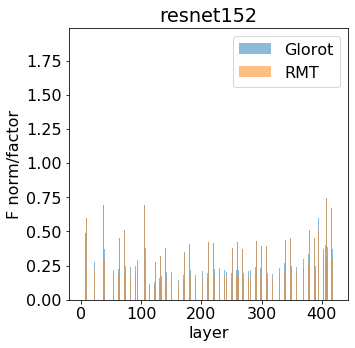

In [8]:
all_names = [ 'resnet18', 'resnet34', 'resnet50', 'resnet101','resnet152']

all_models = []


all_models.append(models.resnet18(pretrained=True))
all_models.append(models.resnet34(pretrained=True))
all_models.append(models.resnet50(pretrained=True))
all_models.append(models.resnet101(pretrained=True))
all_models.append(models.resnet152(pretrained=True))

plot_checks(all_names, all_models)


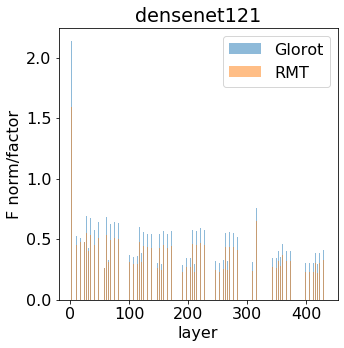

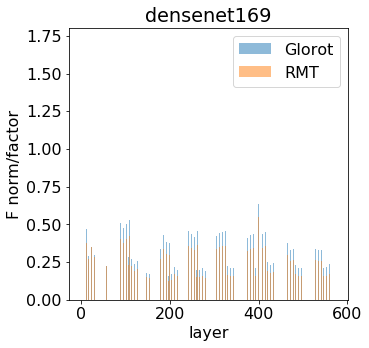

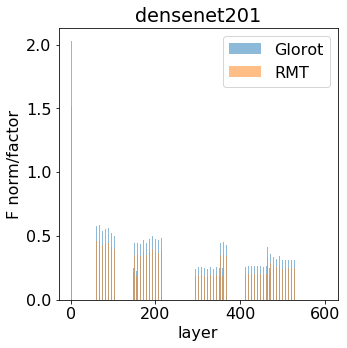

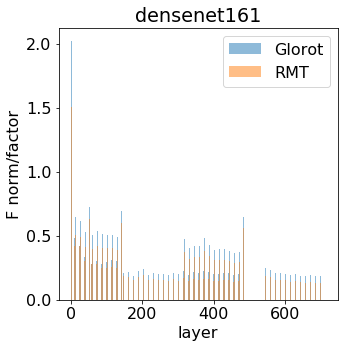

In [9]:
all_names = [ 'densenet121', 'densenet169', 'densenet201', 'densenet161']

all_models = []

all_models.append(models.densenet121(pretrained=True))
all_models.append(models.densenet161(pretrained=True))
all_models.append(models.densenet169(pretrained=True))
all_models.append(models.densenet201(pretrained=True))

plot_checks(all_names, all_models)

In [10]:
!pip install pytorchcv

In [11]:
import pytorchcv
from pytorchcv.model_provider import get_model as ptcv_get_model
import torch

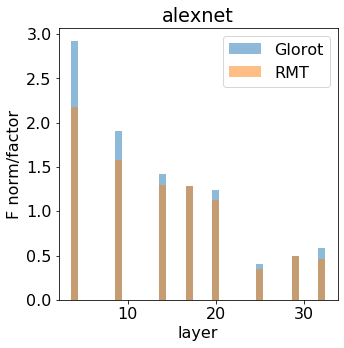

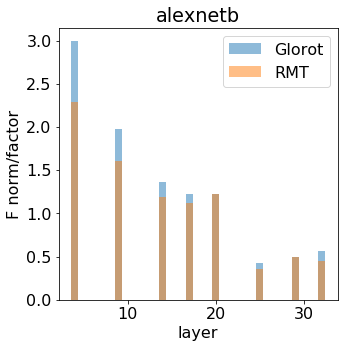

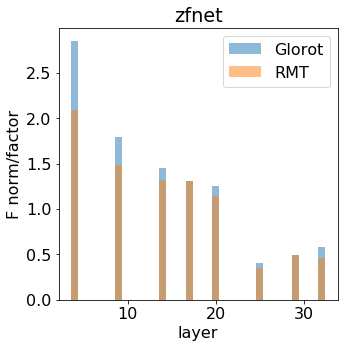

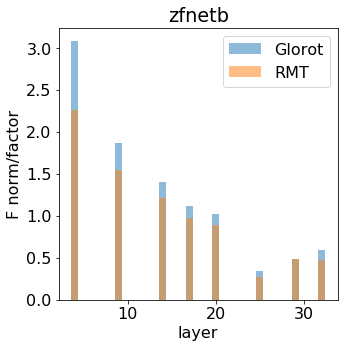

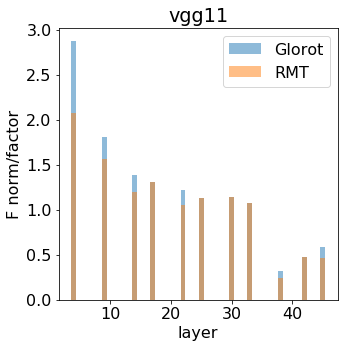

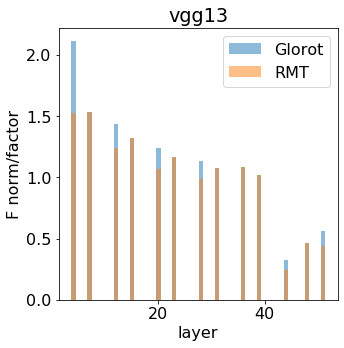

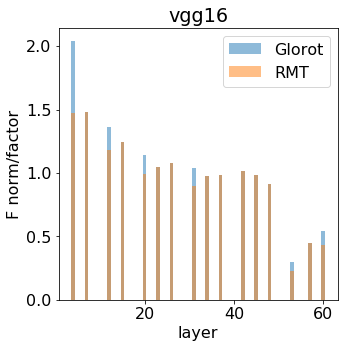

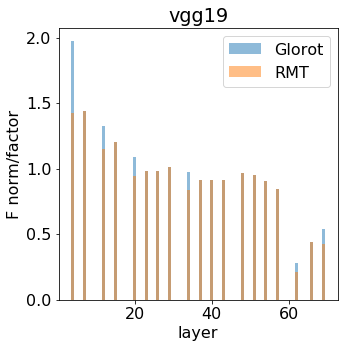

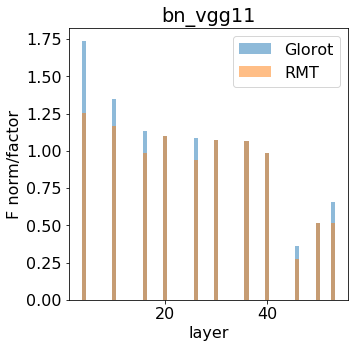

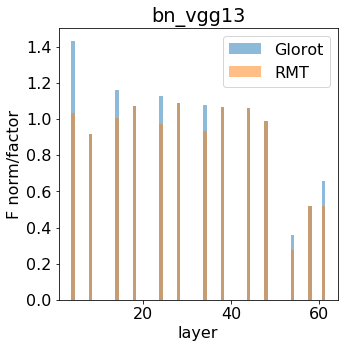

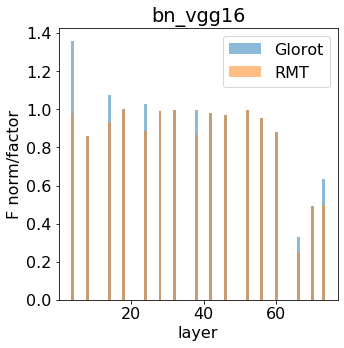

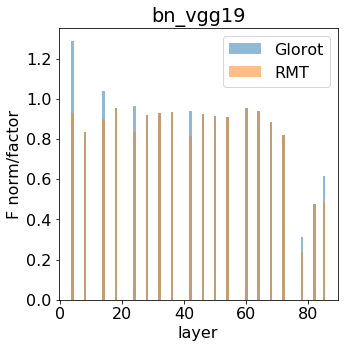

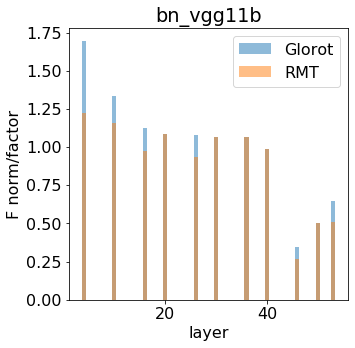

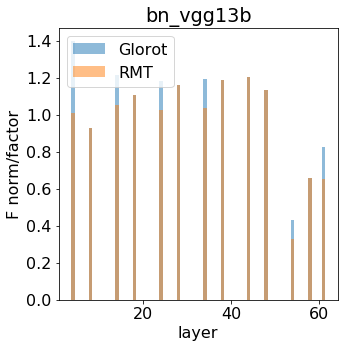

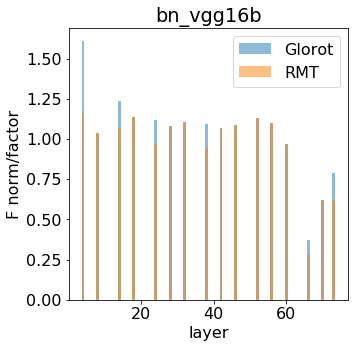

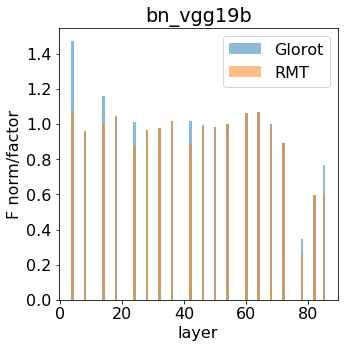

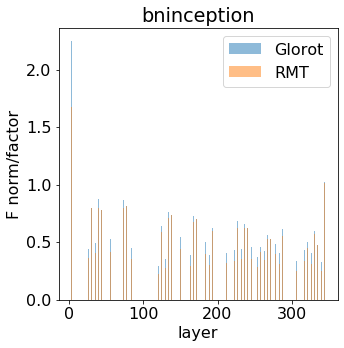

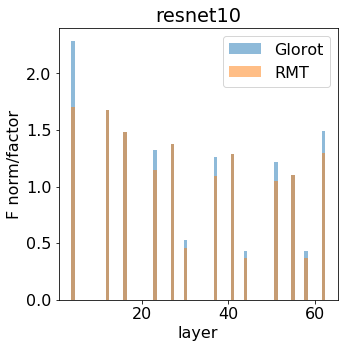

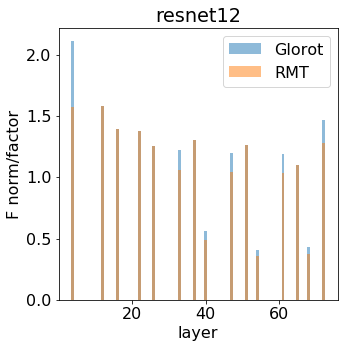

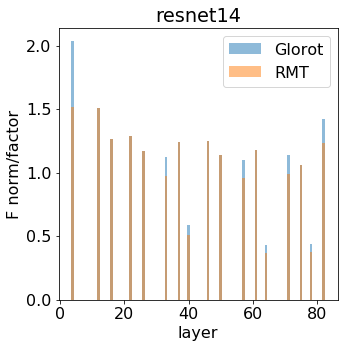

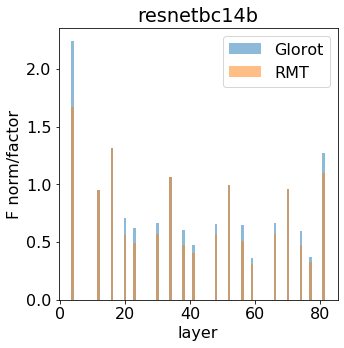

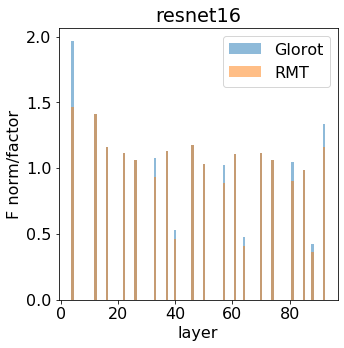

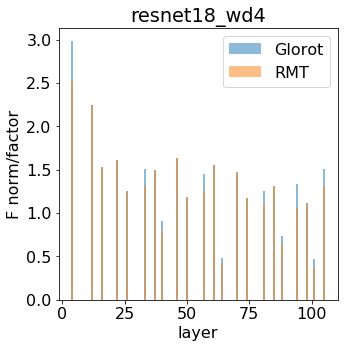

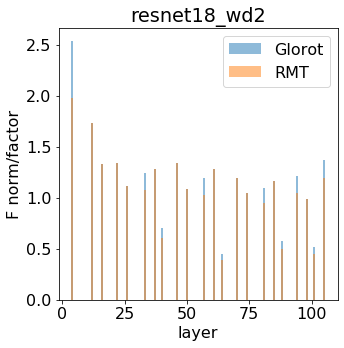

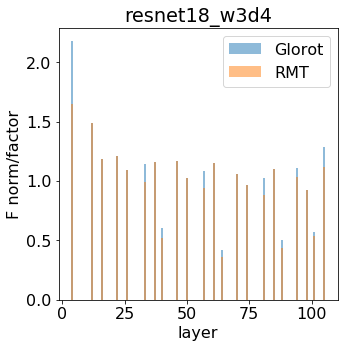

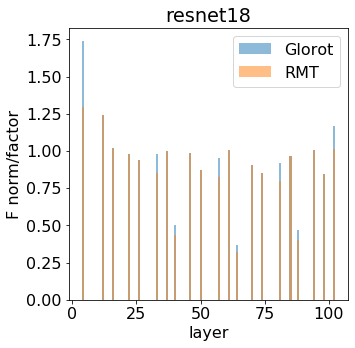

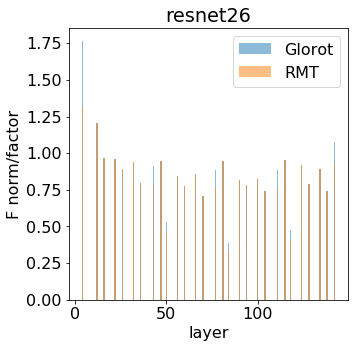

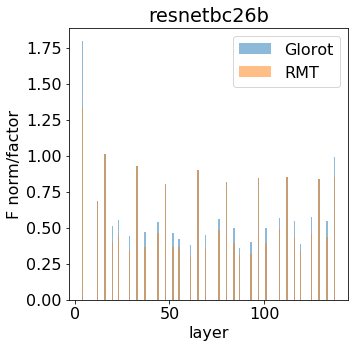

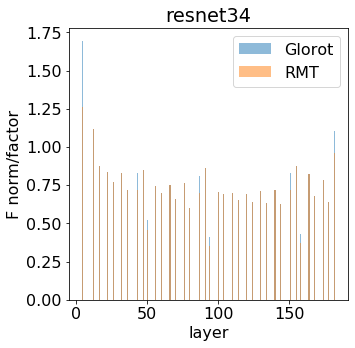

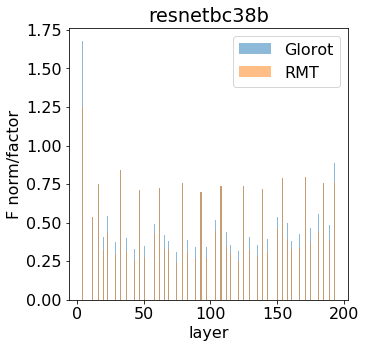

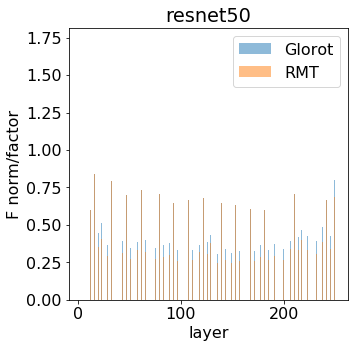

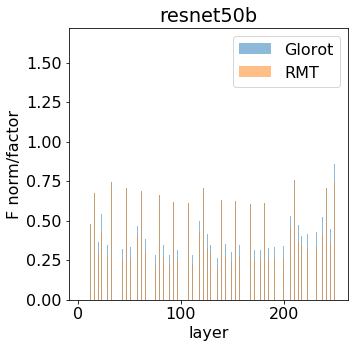

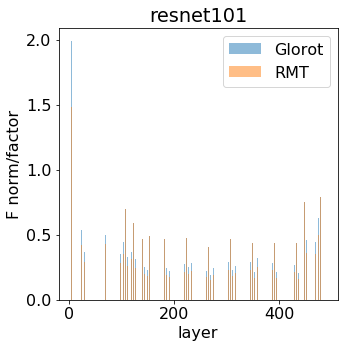

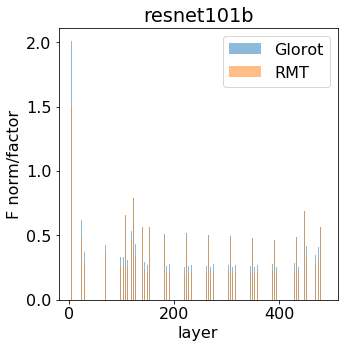

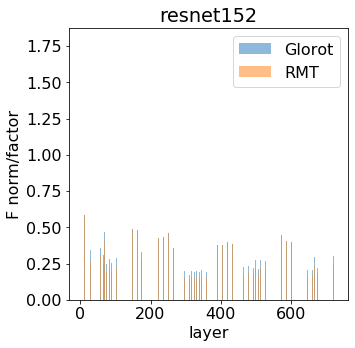

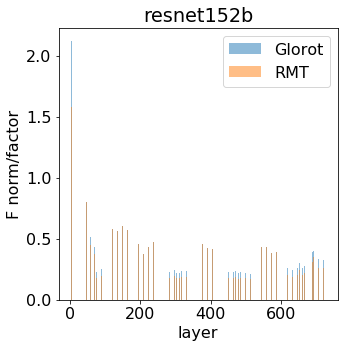

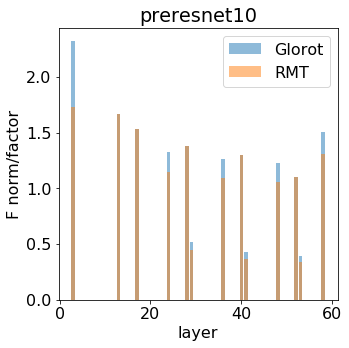

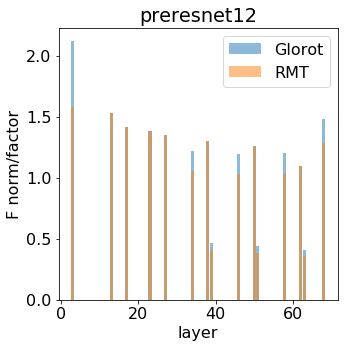

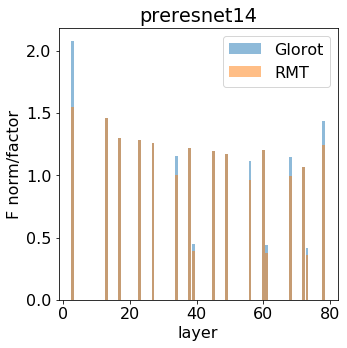

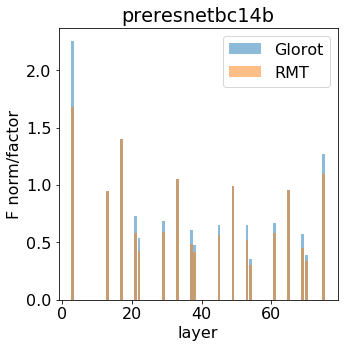

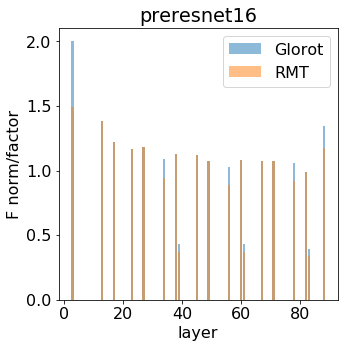

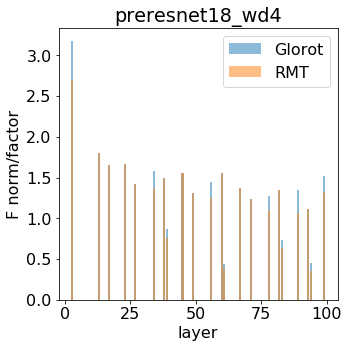

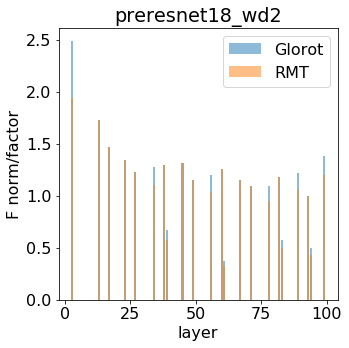

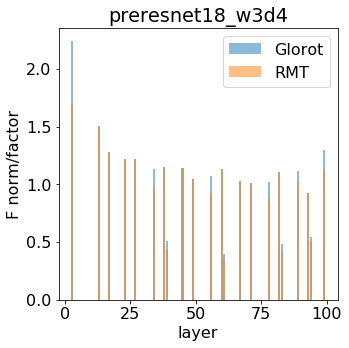

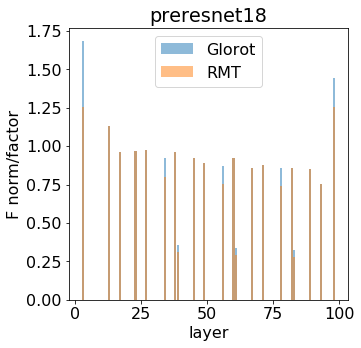

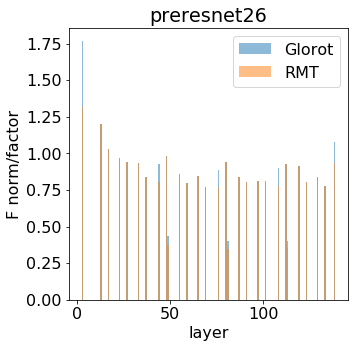

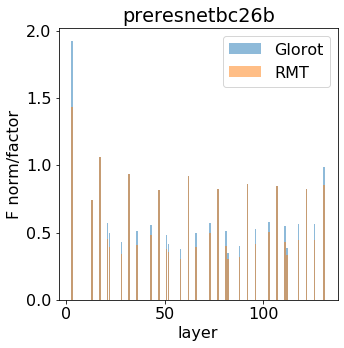

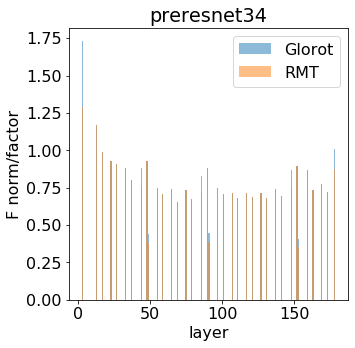

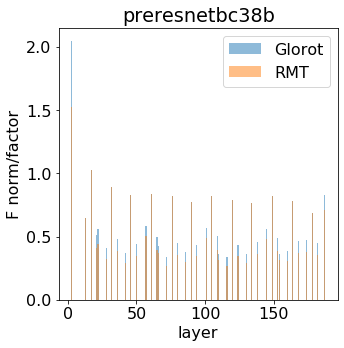

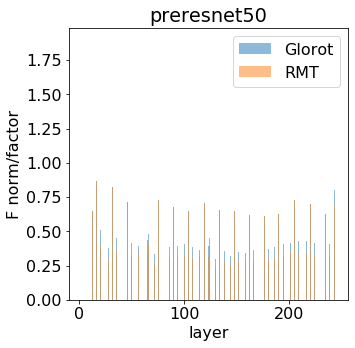

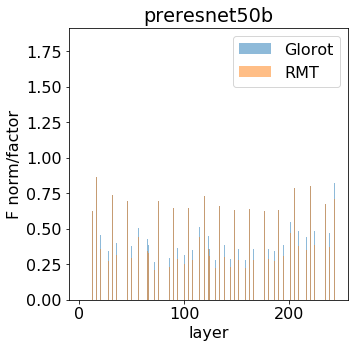

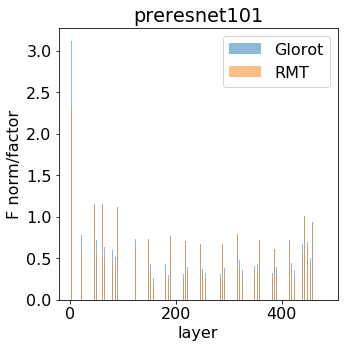

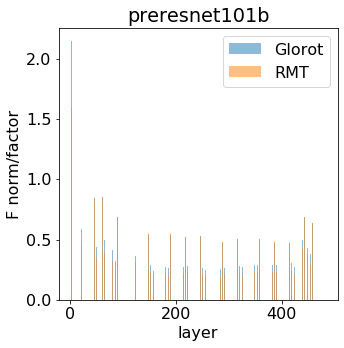

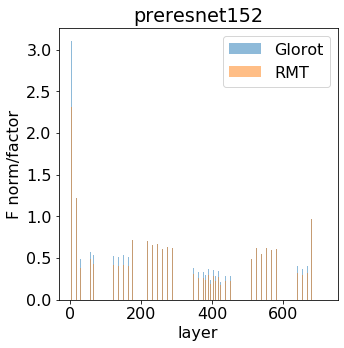

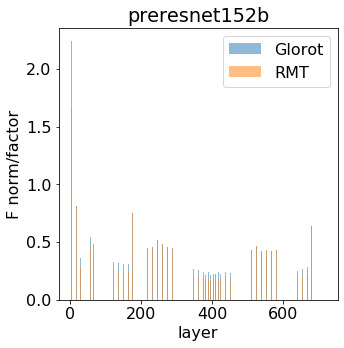

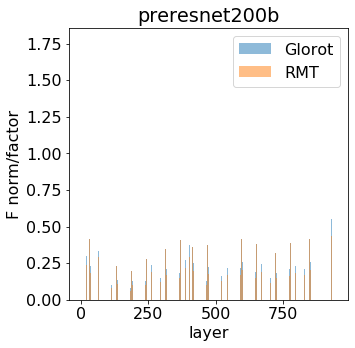

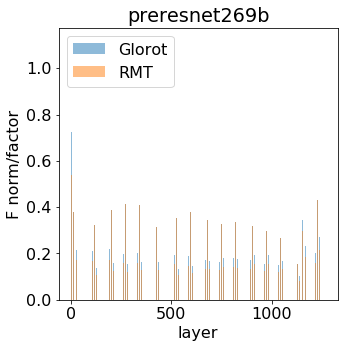

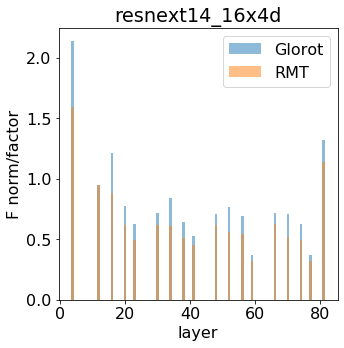

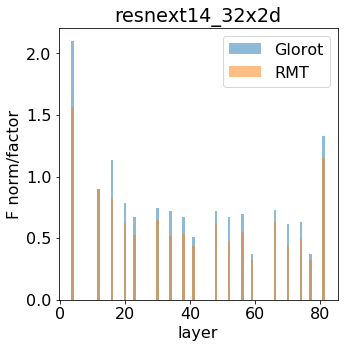

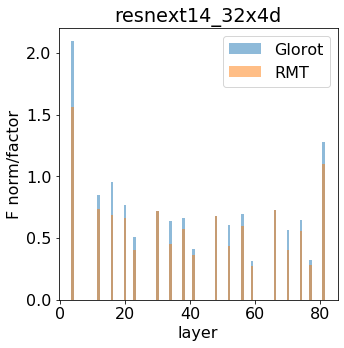

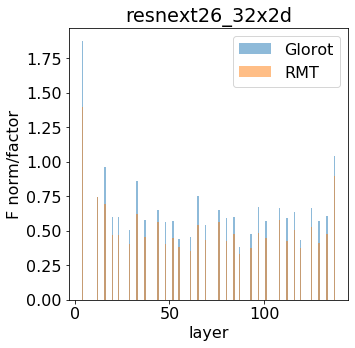

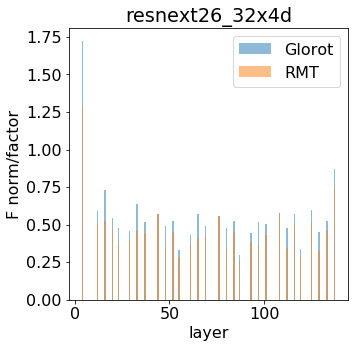

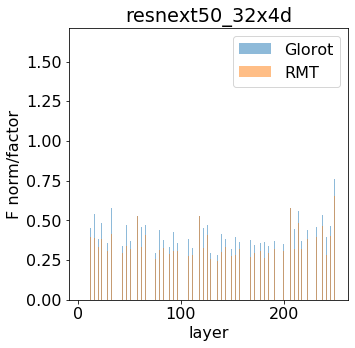

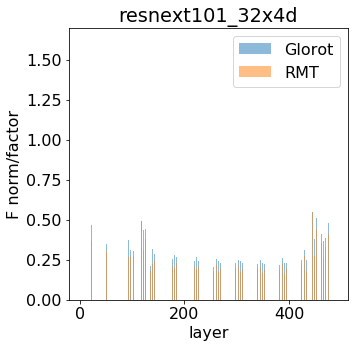

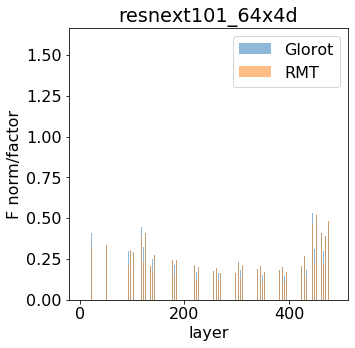

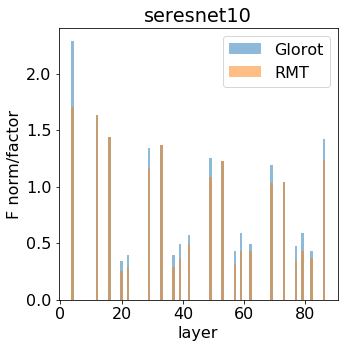

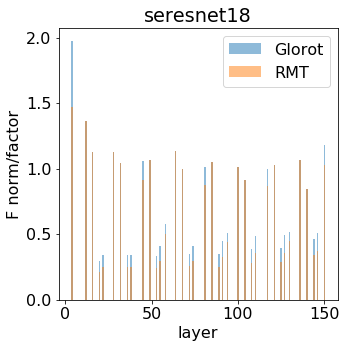

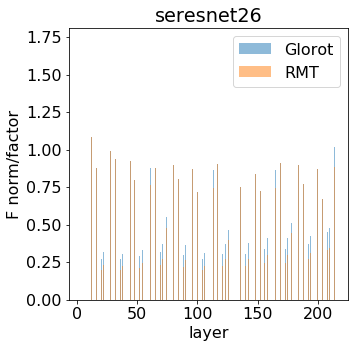

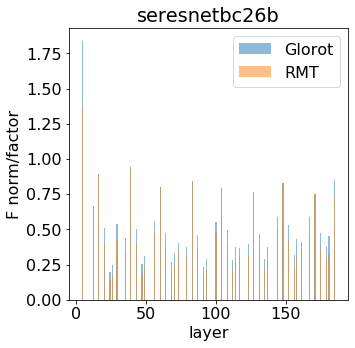

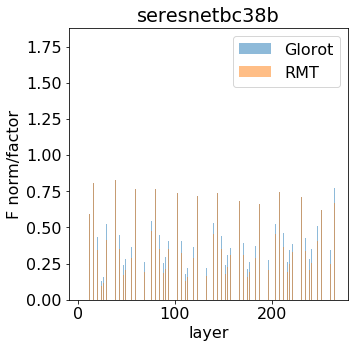

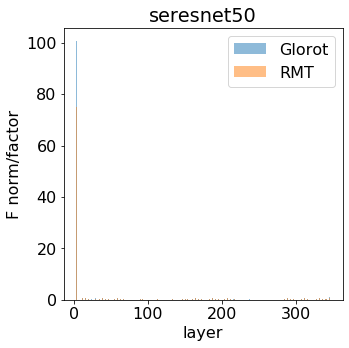

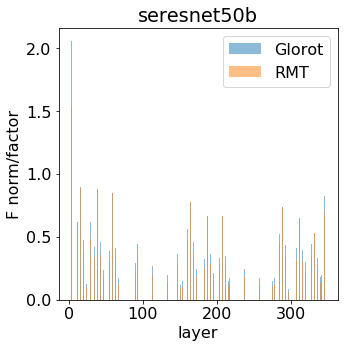

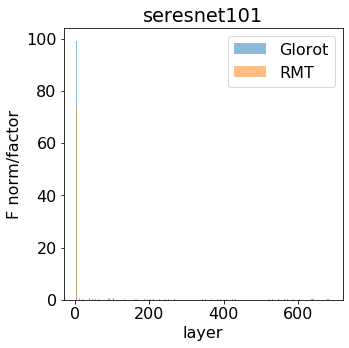

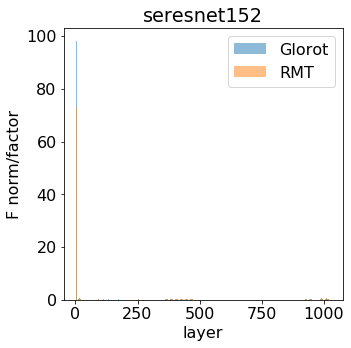

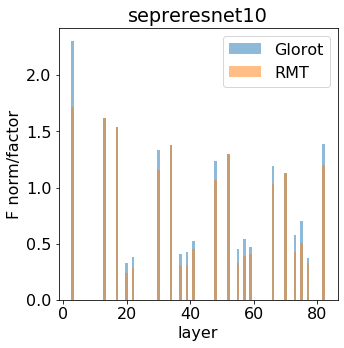

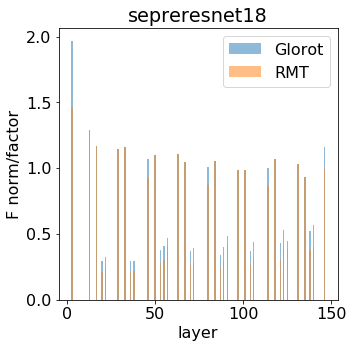

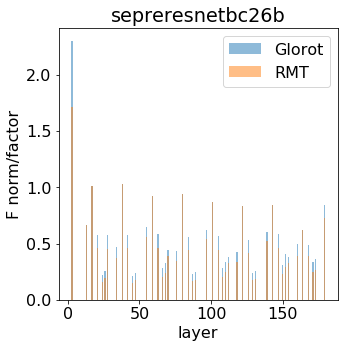

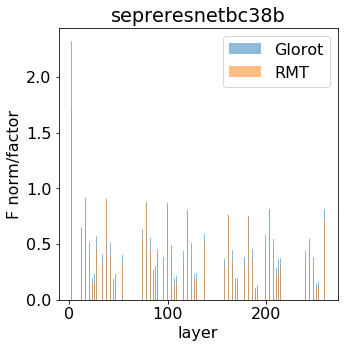

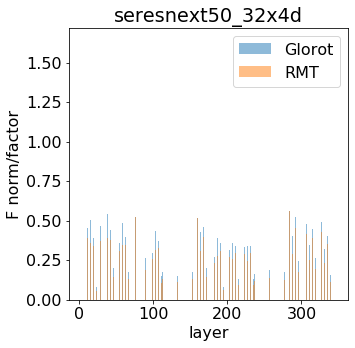

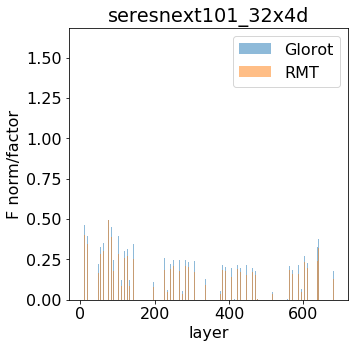

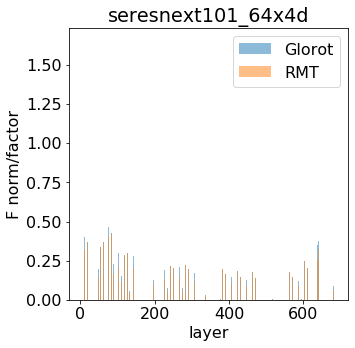

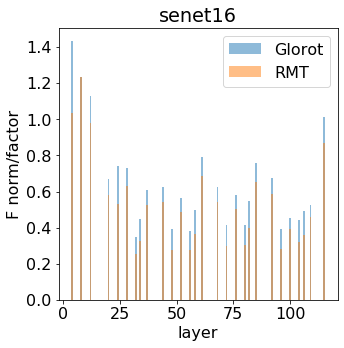

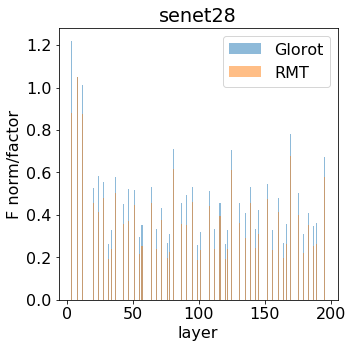

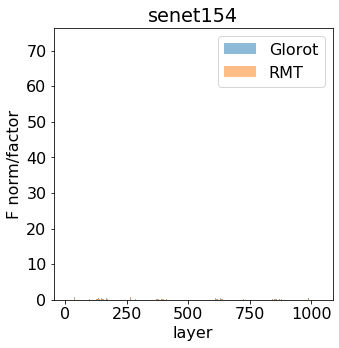

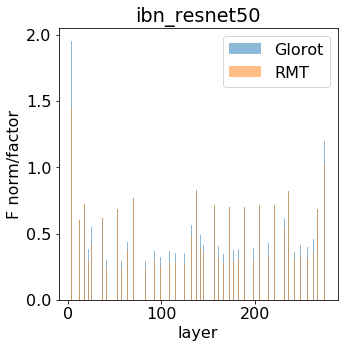

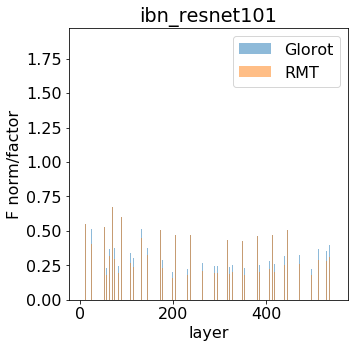

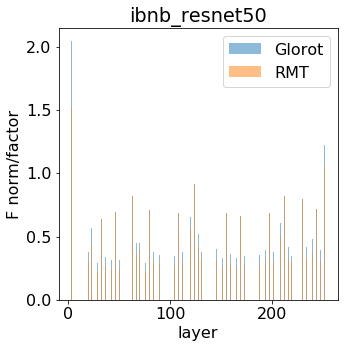

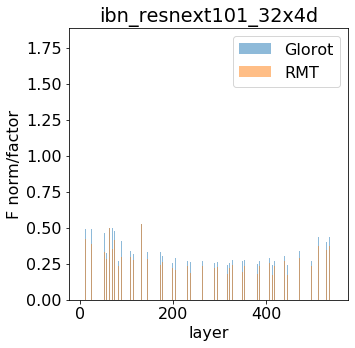

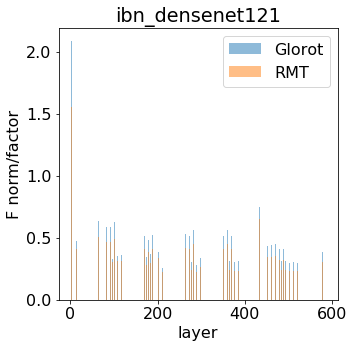

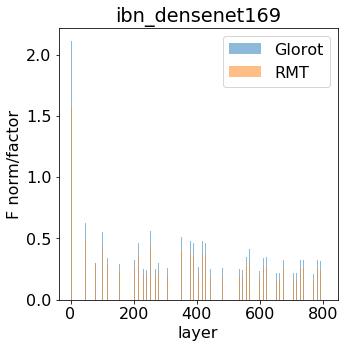

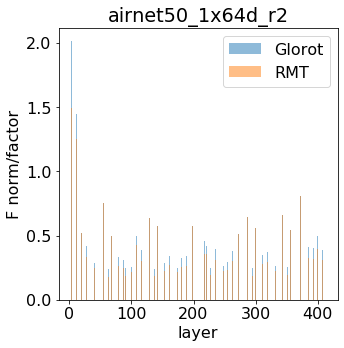

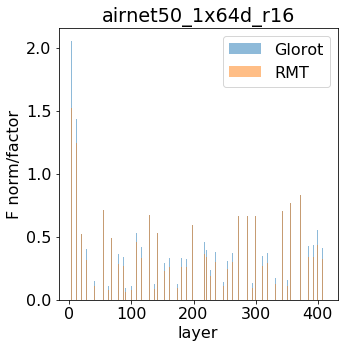

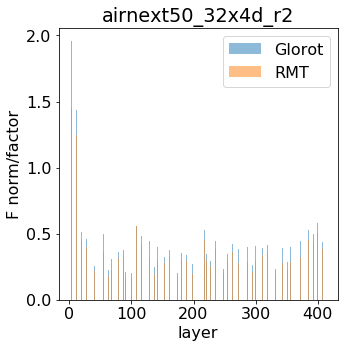

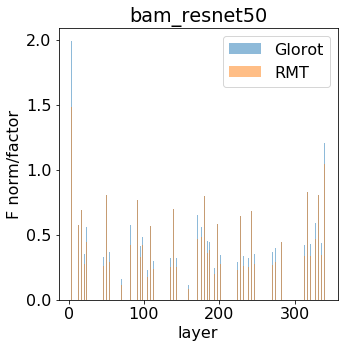

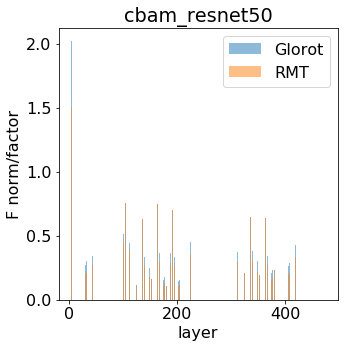

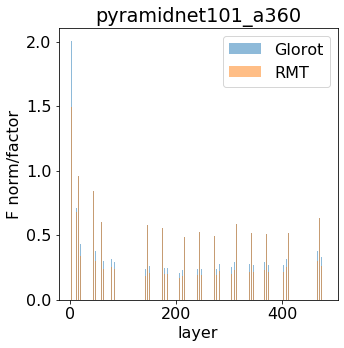

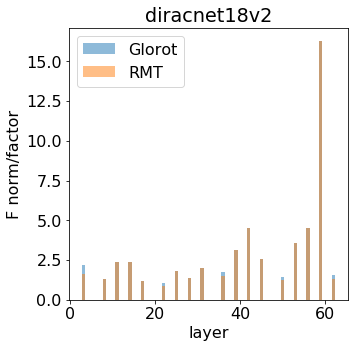

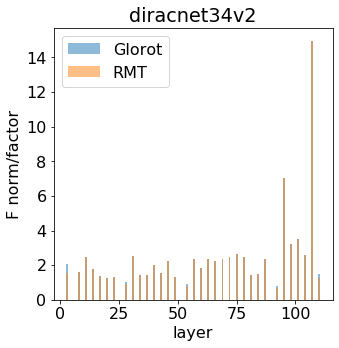

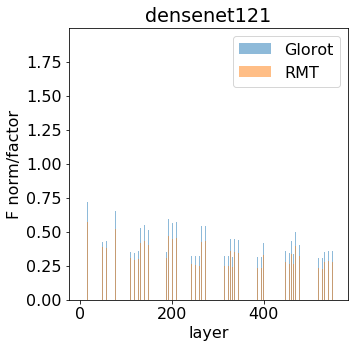

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/densenet161-0644-c0fb22c8.pth.


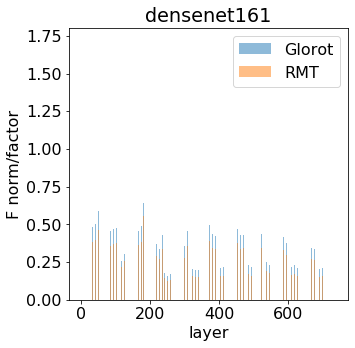

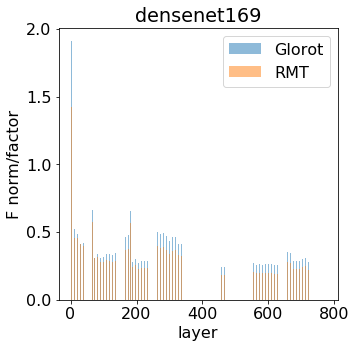

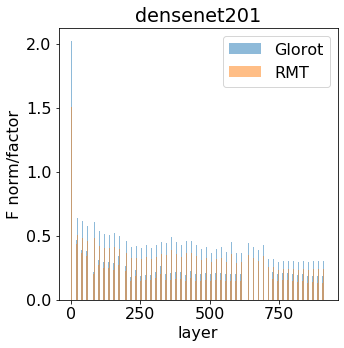

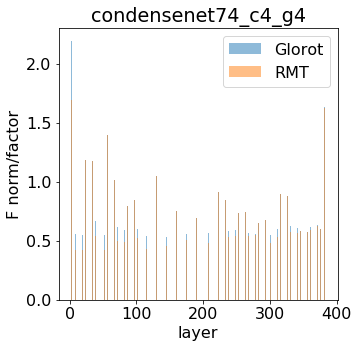

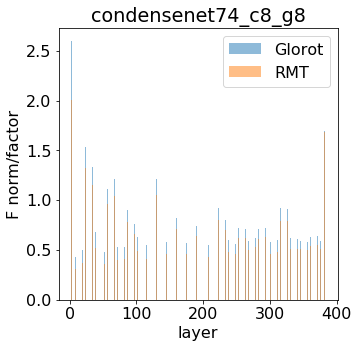

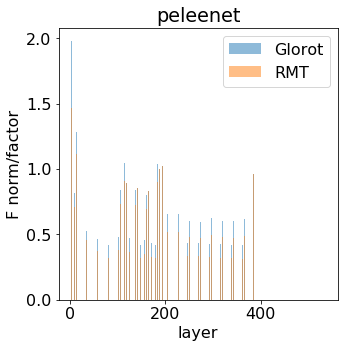

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/wrn50_2-0641-83897ab9.pth.


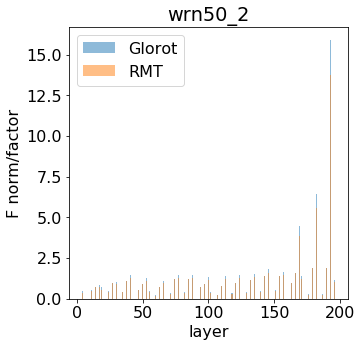

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/drnc26-0755-35405bd5.pth.


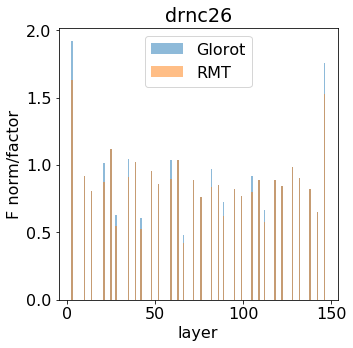

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/drnc42-0657-7c99c460.pth.


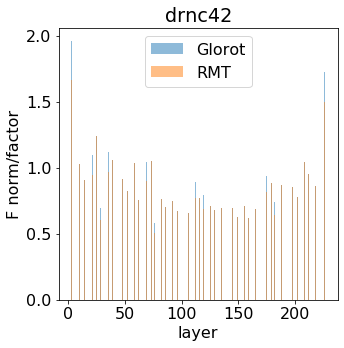

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/drnc58-0601-70ec1f56.pth.


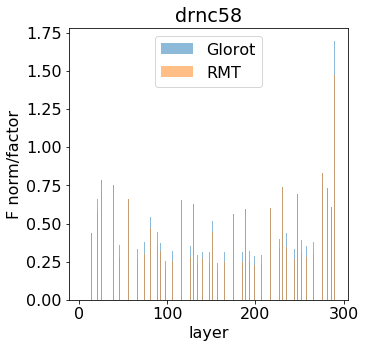

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/drnd22-0823-5c2c6a0c.pth.


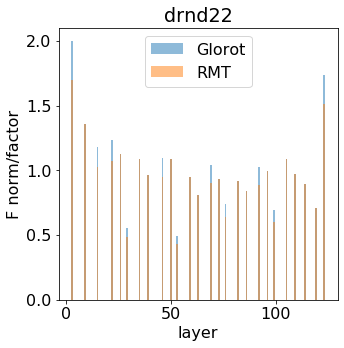

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/drnd38-0695-4630f0fb.pth.


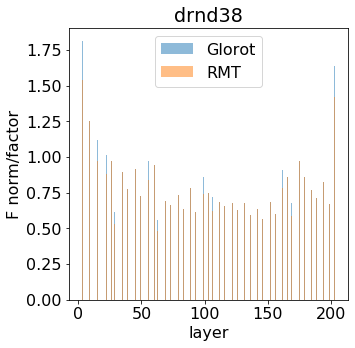

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/drnd54-0586-bfdc1f88.pth.


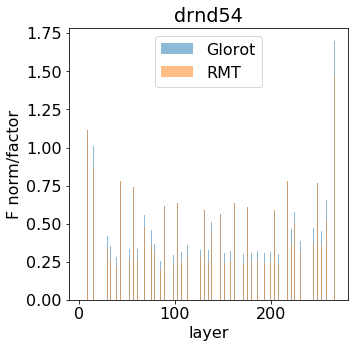

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/drnd105-0548-a643f4dc.pth.


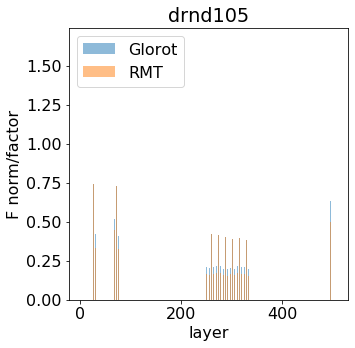

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dpn68-0679-a33c98c7.pth.


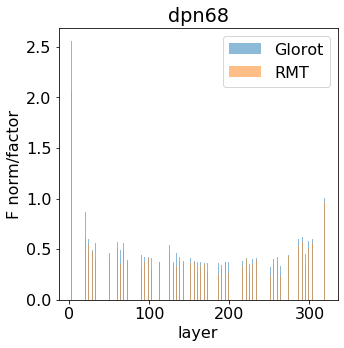

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dpn98-0553-52c55969.pth.


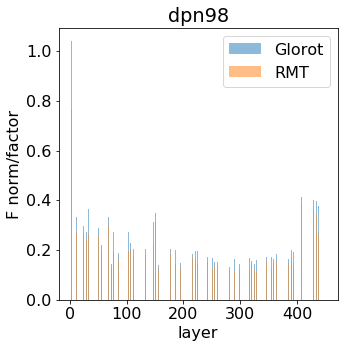

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dpn131-0548-0c53e5b3.pth.


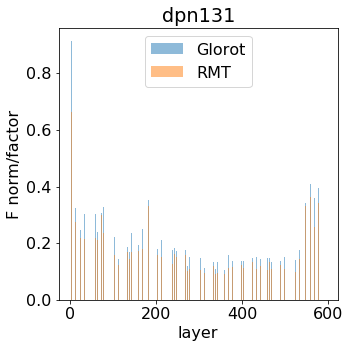

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/darknet_ref-1718-034595b4.pth.


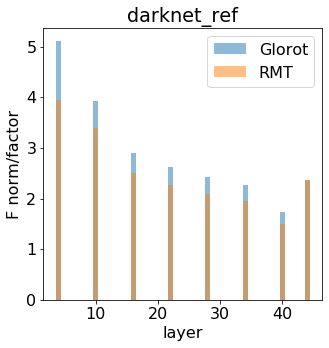

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/darknet_tiny-1784-4561e1ad.pth.


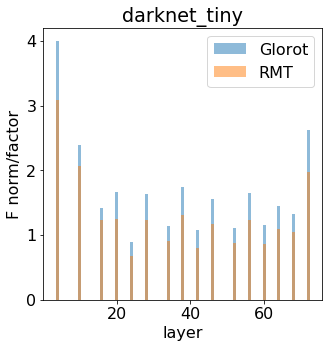

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/darknet53-0564-b36bef6b.pth.


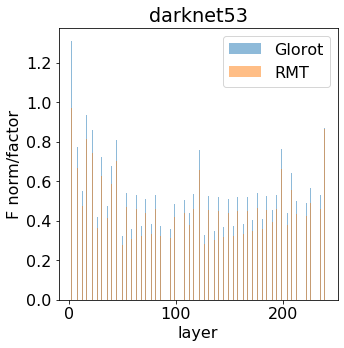

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/irevnet301-0841-95dc8d94.pth.


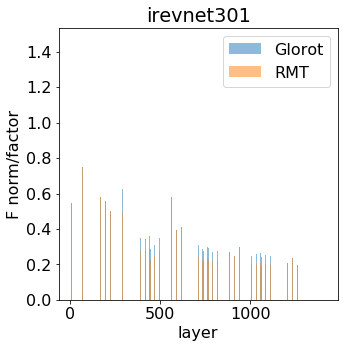

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/bagnet9-2961-cab11792.pth.


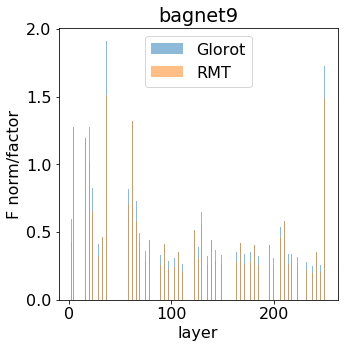

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/bagnet17-1884-6b2a100f.pth.


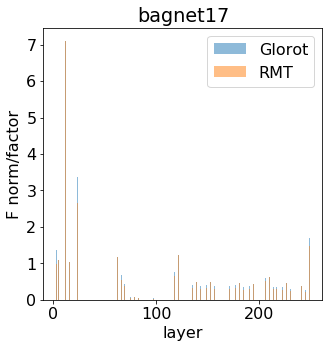

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/bagnet33-1301-4f17b6e8.pth.


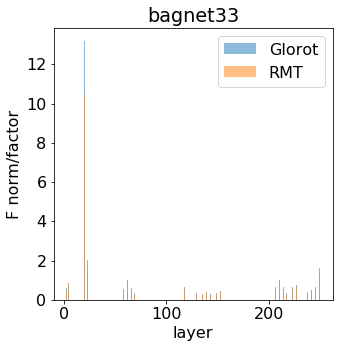

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dla34-0794-04698d78.pth.


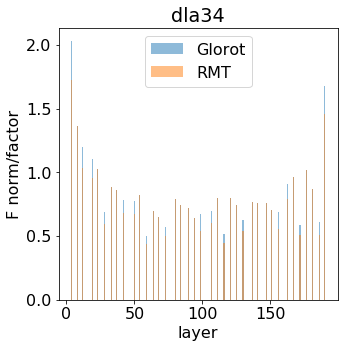

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dla46c-1323-efcd3636.pth.


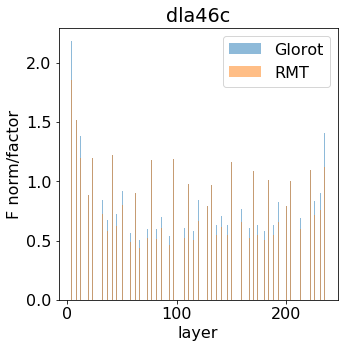

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dla46xc-1269-00d3754a.pth.


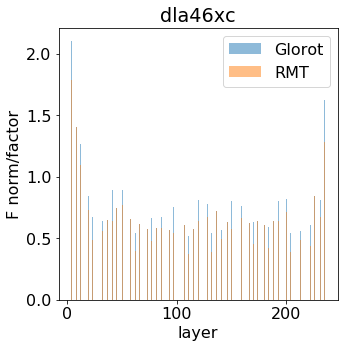

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dla60-0669-b2cd6e51.pth.


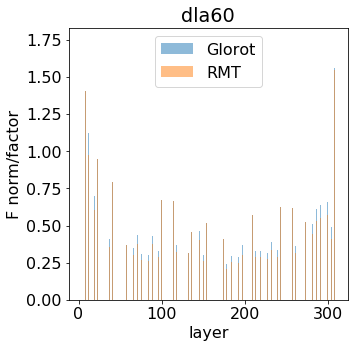

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dla60x-0598-88547d3f.pth.


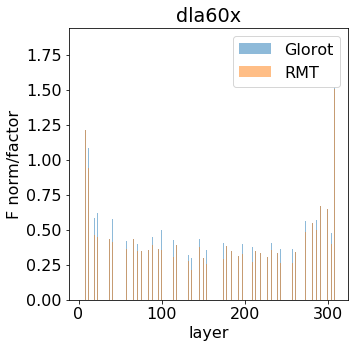

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dla60xc-1091-0f6381f3.pth.


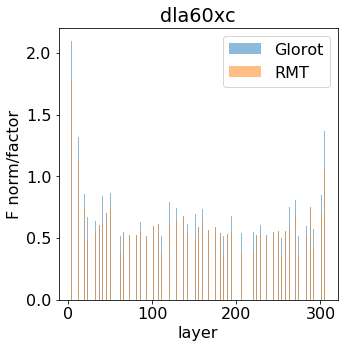

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dla102-0605-11df1322.pth.


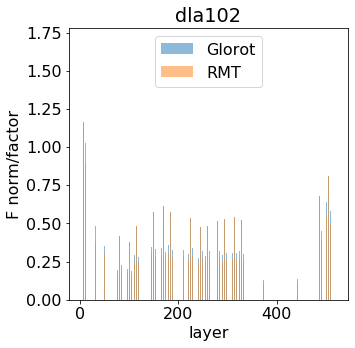

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dla102x-0577-58331655.pth.


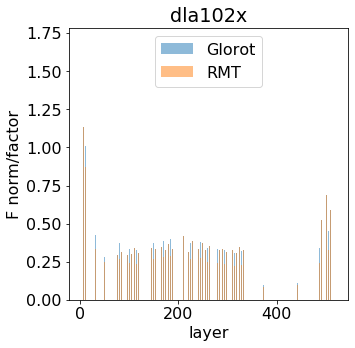

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dla102x2-0536-07936111.pth.


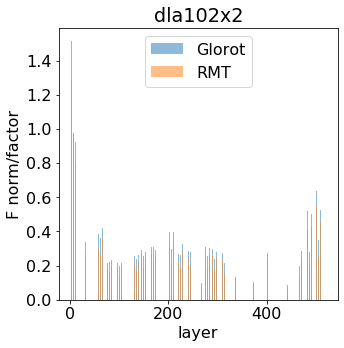

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/dla169-0566-ae0c6a82.pth.


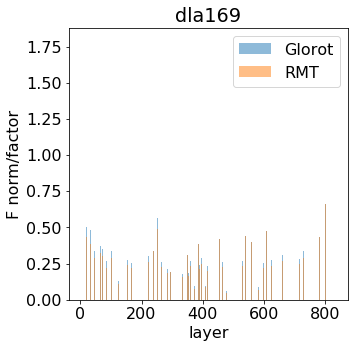

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/fishnet150-0604-f5af4873.pth.


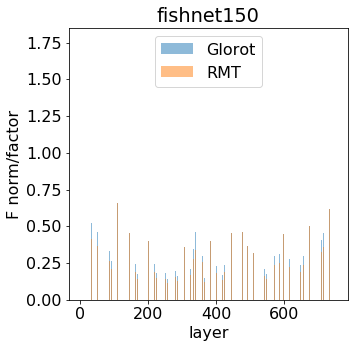

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/espnetv2_wd2-2015-d234781f.pth.


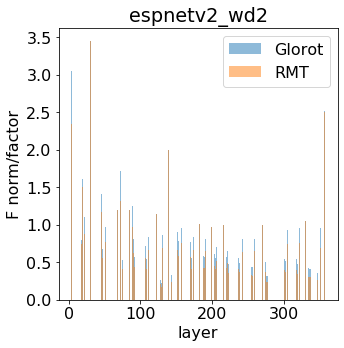

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/espnetv2_w1-1345-550d5422.pth.


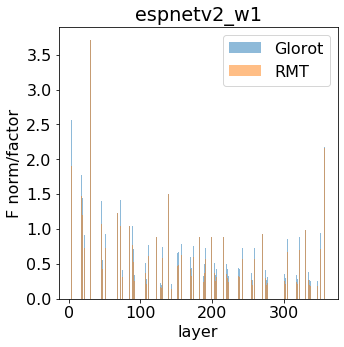

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/espnetv2_w5d4-1218-85d97b2b.pth.


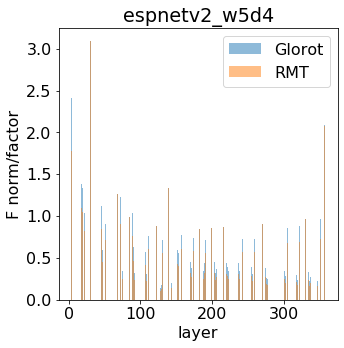

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/espnetv2_w3d2-1129-3bbb49ad.pth.


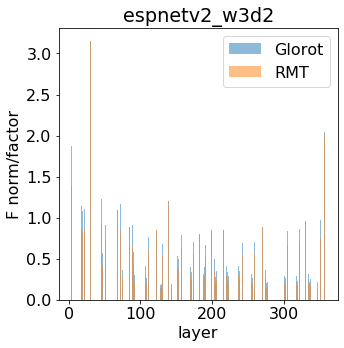

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/espnetv2_w2-0961-13ba0f72.pth.


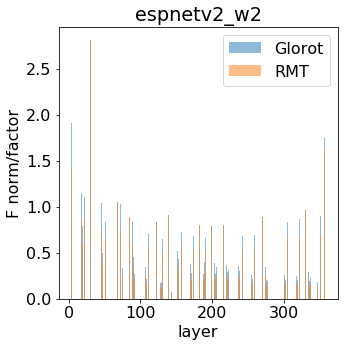

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/hrnet_w18_small_v1-0933-77541fc6.pth.


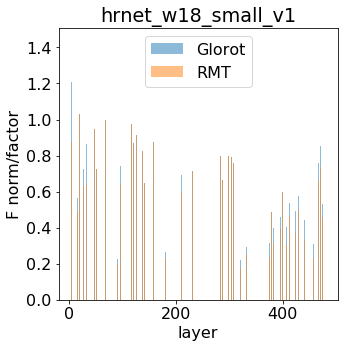

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/hrnet_w18_small_v2-0758-27f85f31.pth.


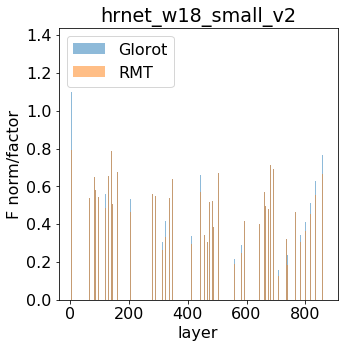

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/hrnetv2_w18-0656-78b1f85b.pth.


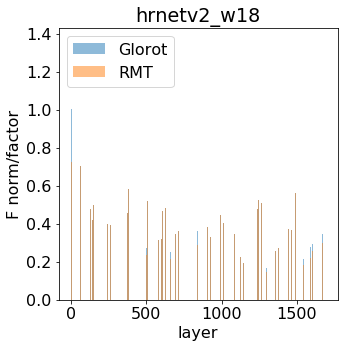

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/hrnetv2_w30-0578-839e57eb.pth.


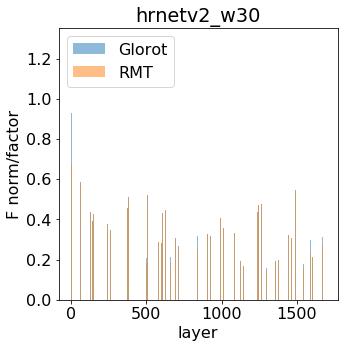

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/hrnetv2_w32-0581-bef9ada0.pth.


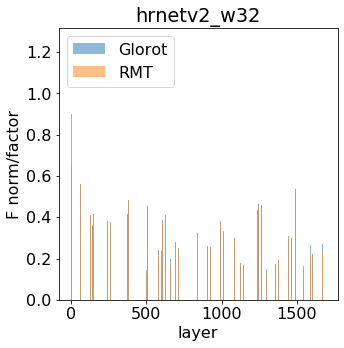

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/hrnetv2_w40-0553-e4b5a38a.pth.


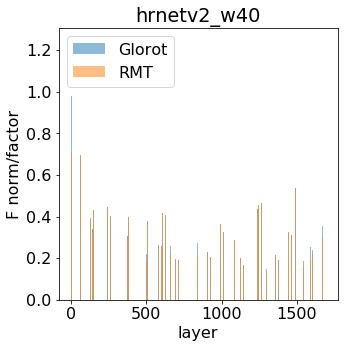

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/hrnetv2_w44-0563-9321bfd8.pth.


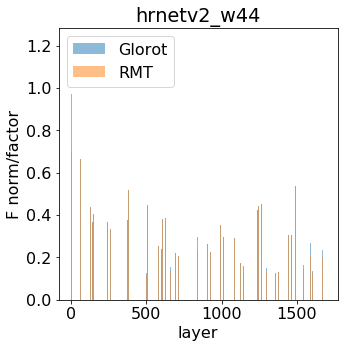

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/hrnetv2_w48-0548-40f98610.pth.


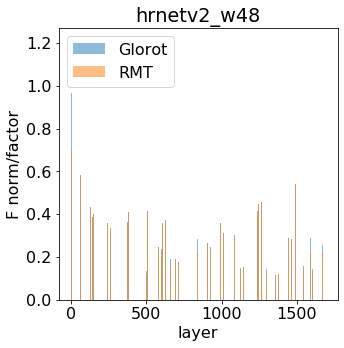

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/hrnetv2_w64-0535-5961efd0.pth.


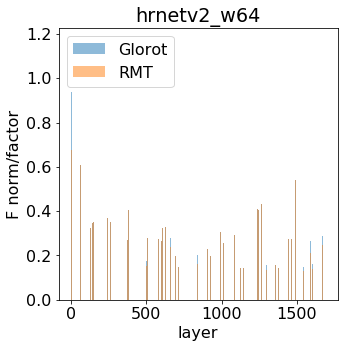

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/squeezenet_v1_0-1766-afdbcf1a.pth.


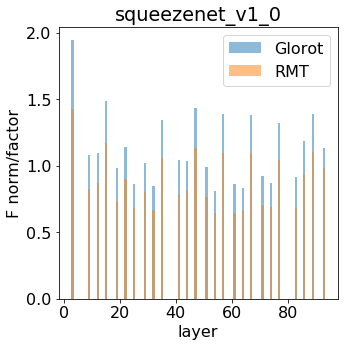

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/squeezenet_v1_1-1772-25b77bc3.pth.


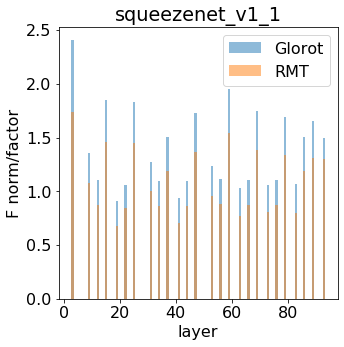

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/squeezeresnet_v1_0-1809-25bfc02e.pth.


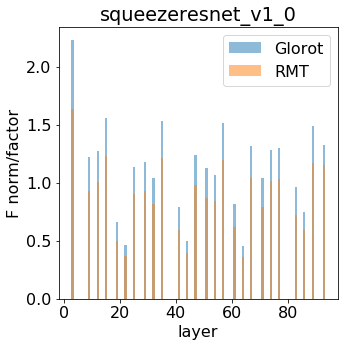

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/squeezeresnet_v1_1-1821-c27ed88f.pth.


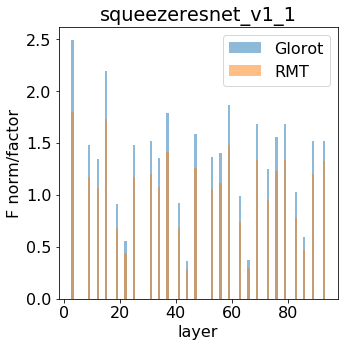

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/sqnxt23_w1-1906-97b74e0c.pth.


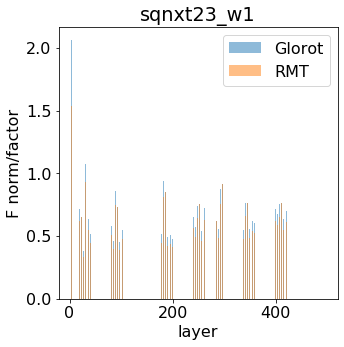

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/sqnxt23_w3d2-1350-c2f21bce.pth.


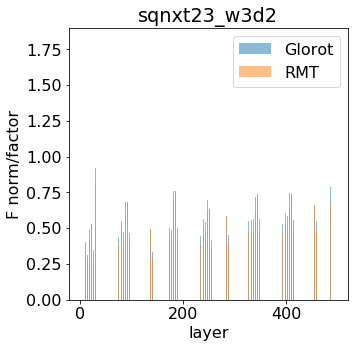

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/sqnxt23_w2-1100-b9bb7302.pth.


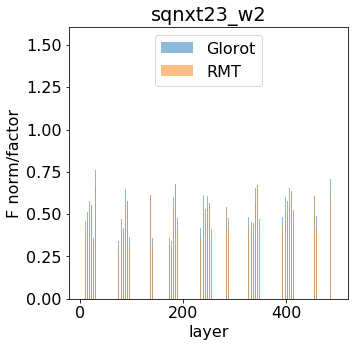

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/sqnxt23v5_w1-1785-2fe3ad67.pth.


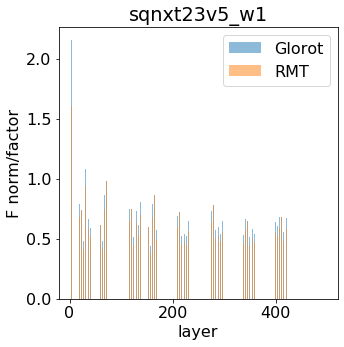

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/sqnxt23v5_w3d2-1301-c244844b.pth.


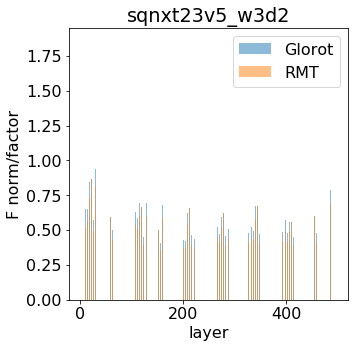

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/sqnxt23v5_w2-1066-229b0d3d.pth.


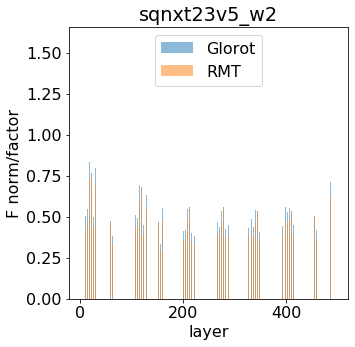

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g1_w1-1389-4cfb65a3.pth.


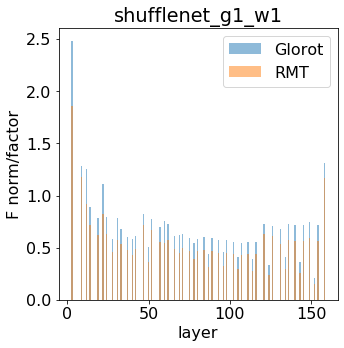

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g2_w1-1363-07256203.pth.


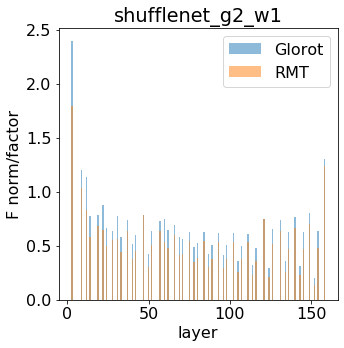

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g3_w1-1348-ce54f64e.pth.


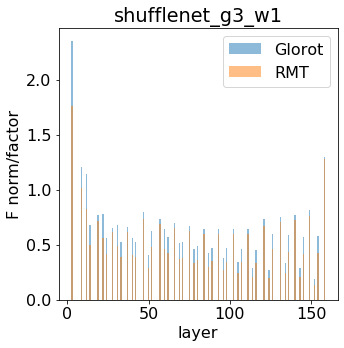

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g4_w1-1335-e2415f82.pth.


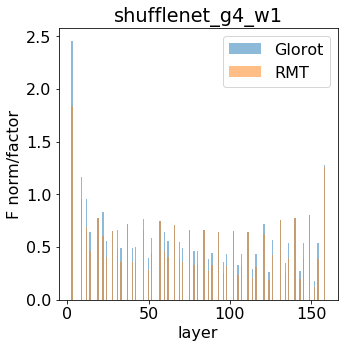

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g8_w1-1342-9a979b36.pth.


INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g1_w3d4-1711-161cd24a.pth.


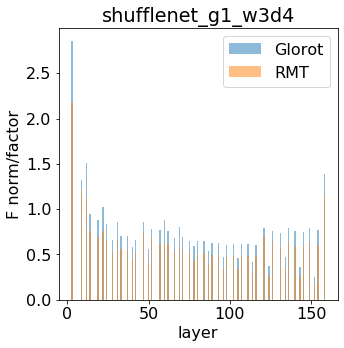

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g3_w3d4-1650-3f3b0aef.pth.


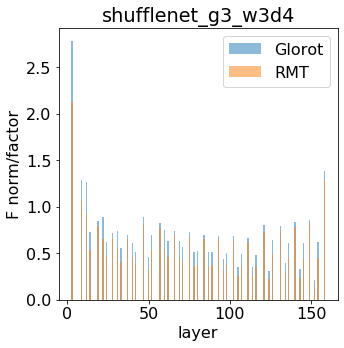

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g1_wd2-2261-dae4bdad.pth.


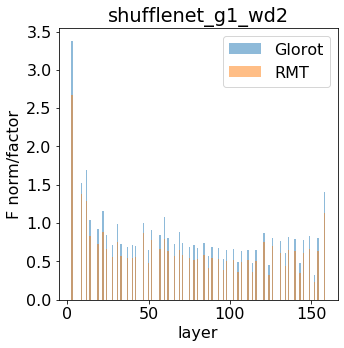

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g3_wd2-2080-ccaacfc8.pth.


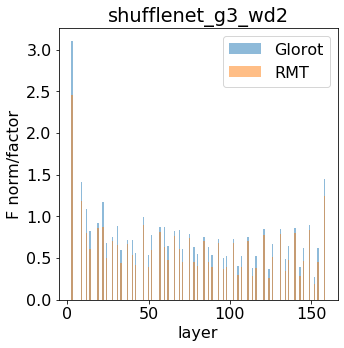

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g1_wd4-3729-47dbd0f2.pth.


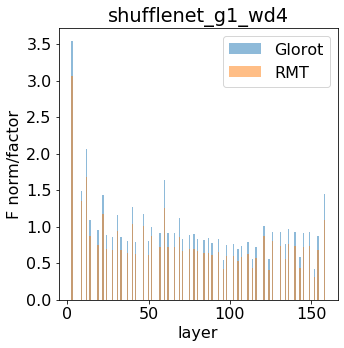

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenet_g3_wd4-3653-6abdd65e.pth.


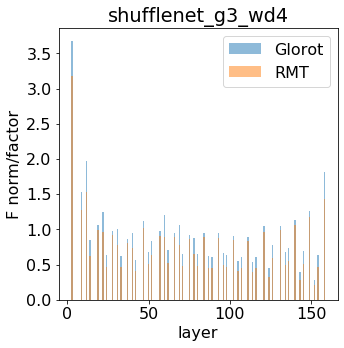

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenetv2_wd2-1865-9c22238b.pth.


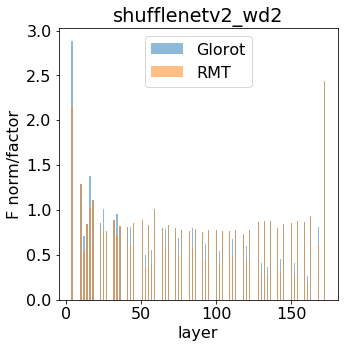

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenetv2_w1-1163-c71dfb7a.pth.


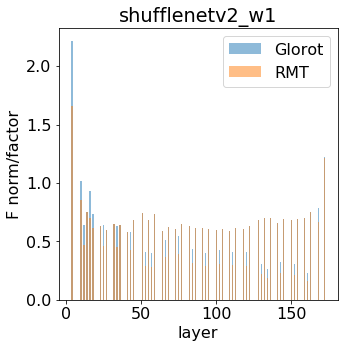

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenetv2_w3d2-0942-26a92304.pth.


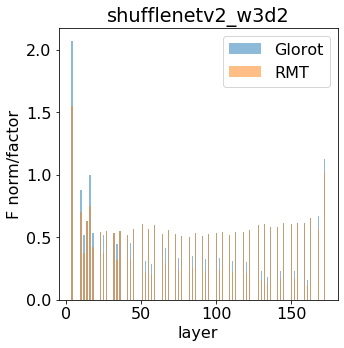

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenetv2_w2-0845-337255f6.pth.


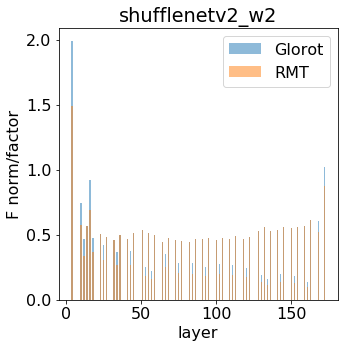

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenetv2b_wd2-1822-01d18d6f.pth.


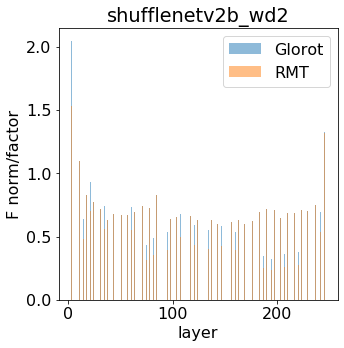

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenetv2b_w1-1125-6a5d3dc4.pth.


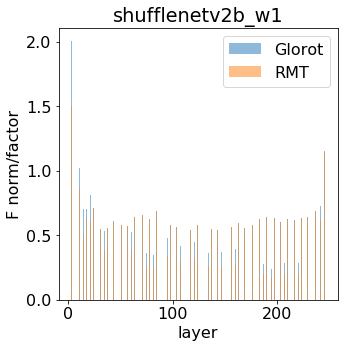

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenetv2b_w3d2-0911-f2106fee.pth.


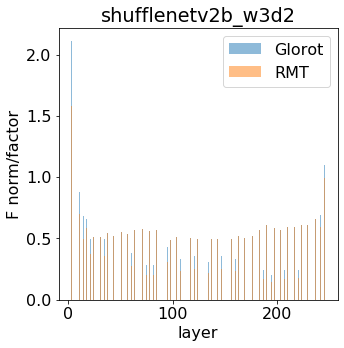

INFO:root:Model file not found. Downloading to /Users/charleshmartin/.torch/models/shufflenetv2b_w2-0834-cb36b92c.pth.


In [ ]:

for modelname in pytorchcv.model_provider._models.keys():
    try:
        model = ptcv_get_model(modelname, pretrained=True)
        plot_checks([modelname], [model])
    except:
        pass